First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Null values:
CustomerID    

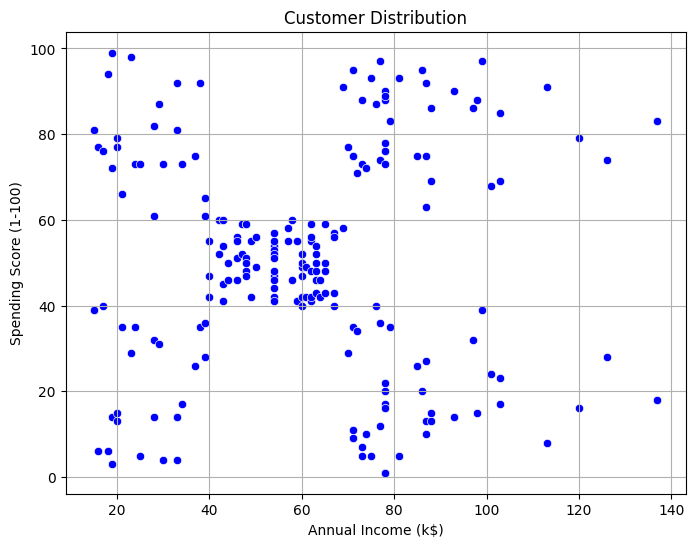

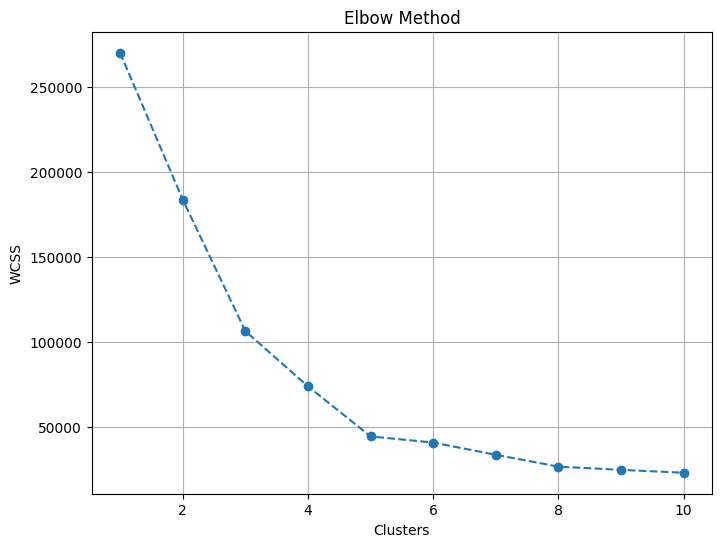

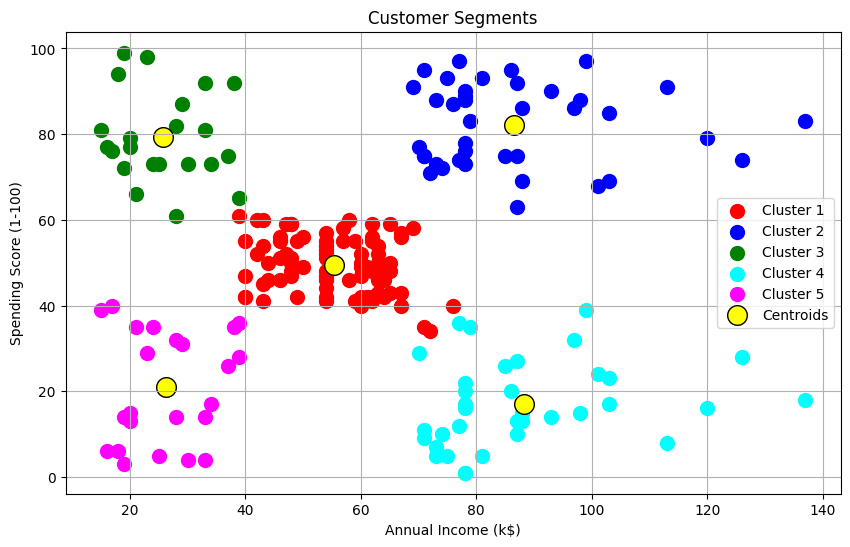

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv("Mall_Customers.csv")

print("First few rows:")
print(df.head())

print("\nInfo:")
print(df.info())

print("\nNull values:")
print(df.isnull().sum())

print("\nDescribe:")
print(df.describe())

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', color='blue')
plt.title('Customer Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(5):
    plt.scatter(X[y_kmeans == i]['Annual Income (k$)'],
                X[y_kmeans == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids', edgecolor='black')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()
